In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 2)

plt.style.use('dark_background')

# Read file

In [2]:
with open('John.txt','r', encoding='utf-8') as f:
    text = f.read()
# end

print(text[:1000])

[1] In the beginning was the Word, and the Word was with God, and the Word was God.
[2] The same was in the beginning with God.
[3] All things were made by him; and without him was not any thing made that was made.
[4] In him was life; and the life was the light of men.
[5] And the light shineth in darkness; and the darkness comprehended it not.
[6] There was a man sent from God, whose name was John.
[7] The same came for a witness, to bear witness of the Light, that all men through him might believe.
[8] He was not that Light, but was sent to bear witness of that Light.
[9] That was the true Light, which lighteth every man that cometh into the world.
[10] He was in the world, and the world was made by him, and the world knew him not.
[11] He came unto his own, and his own received him not.
[12] But as many as received him, to them gave he power to become the sons of God, even to them that believe on his name:
[13] Which were born, not of blood, nor of the will of the flesh, nor of the

# Clean text

In [3]:
text = text.lower()
text = re.sub('\[\d+\]','',text)
text = re.sub('\s+',' ',text)
text = re.sub('[:\(\)\!\?]','',text)
text = re.sub('\. ',' . ',text)
text = re.sub(', ',' , ',text)
text = re.sub('; ',' ; ',text)
text = re.sub('john\d+','',text)
text = text.strip()

print(text[:1000])

in the beginning was the word , and the word was with god , and the word was god . the same was in the beginning with god . all things were made by him ; and without him was not any thing made that was made . in him was life ; and the life was the light of men . and the light shineth in darkness ; and the darkness comprehended it not . there was a man sent from god , whose name was john . the same came for a witness , to bear witness of the light , that all men through him might believe . he was not that light , but was sent to bear witness of that light . that was the true light , which lighteth every man that cometh into the world . he was in the world , and the world was made by him , and the world knew him not . he came unto his own , and his own received him not . but as many as received him , to them gave he power to become the sons of god , even to them that believe on his name which were born , not of blood , nor of the will of the flesh , nor of the will of man , but of god . 

# Encode text

In [4]:
words = np.array(text.split(' '))
vocab = np.unique(words)
vocab[:20]

array([',', '.', ';', 'a', 'abide', 'abideth', 'abiding', 'able', 'abode',
       'about', 'above', 'abraham', "abraham's", 'abroad', 'abundantly',
       'accomplished', 'according', 'accusation', 'accuse', 'accusers'],
      dtype='<U15')

In [6]:
n_words = words.shape[0]
n_vocab = vocab.shape[0]

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
vocab_enc = LE.fit_transform(vocab).astype(int)
words_enc = LE.transform(words).astype(int)

df = pd.DataFrame({'words':words,'words_enc':words_enc})
df.value_counts().head(20)

words  words_enc
,      0            1914
the    1210         1039
and    46            922
.      1             790
that   1209          530
of     826           474
he     541           457
i      586           423
him    564           412
unto   1290          377
not    820           297
jesus  609           253
me     752           245
said   999           237
ye     1407          234
is     600           229
in     590           226
to     1257          222
they   1225          214
but    184           199
Name: count, dtype: int64

# Get transition probabilities (kernel)

In [7]:
P = np.zeros((n_vocab,n_vocab))

for i in range(n_words-1):
    jj = words_enc[i]
    kk = words_enc[i+1]
    P[jj,kk] += 1
# end

# Normalize kernel rows so they sum to 1

In [8]:
for i in range(n_vocab):
    tot = P[i,:].sum()
    if tot > 0:
        P[i,:] = P[i,:] / tot
    # end
# end

# Visualize kernel

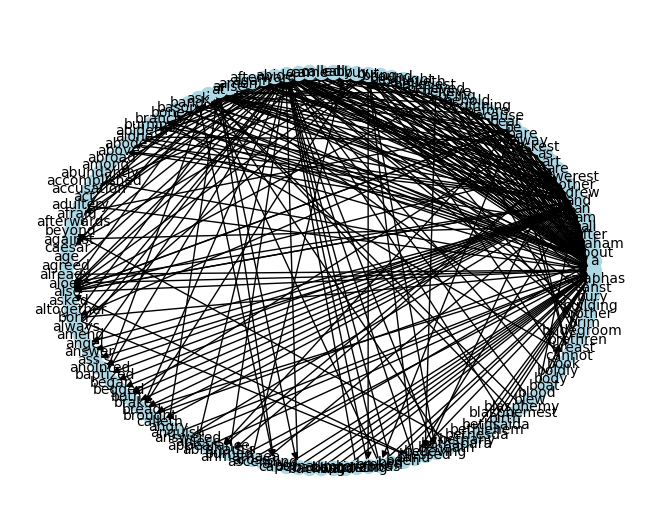

In [9]:
import networkx as nx

# Create directed graph
G = nx.DiGraph()

# Add edges with weights > 0
n = P.shape[0]
n = 200
for i in range(n):
    for j in range(n):
        weight = P[i, j]
        if weight > 0.0:
            G.add_edge(vocab[i], vocab[j], weight=weight)

# Draw the graph
pos = nx.circular_layout(G)  # or use nx.circular_layout(G), etc.
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=100, arrows=True, font_size=10)

plt.title("Directed Weighted Graph from Matrix P")
plt.axis('off')
plt.show()

# Generate new text

In [11]:
nStep = 100

start = 'the'
start_enc = LE.transform([start])[0]

chain_enc = [start_enc]
for i in range(nStep):
    curr = chain_enc[i]
    new = np.random.choice( vocab_enc, p=P[curr,:], size=1 )[0]
    chain_enc.append(new)
# end
chain_enc = np.array(chain_enc)

chain = LE.inverse_transform(chain_enc)

text_gen = ' '.join(chain)
print(text_gen)

the world . and look for the feet of the beginning at supper being interpreted , and told the beginning . for he that they have ye have power over the day . and the people who can we do well , and pharisees therefore , and departed again into the husbandman . pilate , to the wife of god should not that they said unto john . these things unto you , because there and two hundred pound weight . for jesus said , he that hath heard of john stood on the morning he that he spake , and
